# "How to make plots for scientific publications in python?"
> "The main purpose of this post is to present a practical example of how to improve the design of a graphic for an article. Here I intend to provide a practical example as well as a structure to be followed in several cases."

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Plots, Python, Scientific Publication, Tutotial]


In The following post I want to sahre a tutorial covering the "basic" plotting tools to make a publication quality plot. We are going through the following steps:

* load some data and make the simplest plot. 
* Identify the differences between simple and not-so-simple plot
* Change the graph step by step.

We shall start by preparing some of the libraries required for now:

In [2]:
%matplotlib inline                        
from numpy import loadtxt, sqrt, array    #Some mathematical functions

import matplotlib.pyplot as plt           #For plotting
from matplotlib import rc                 #To alter the defaults of plots       
from IPython import display               #A helper to display figures that are being updated

## Simplest plot

First, we will address the fundamental principles for our work of plots in scientific works. The first step concerns generating the data to be plotted in question, which can vary greatly from survey to survey, or opening different file formats to make your data viewable.

In order to make our tutorial broader, I will consider the second case here (open a file with our information) as it is more general and as far as generating data for your research is concerned, I don't see how a tutorial can be very generalizable

The following code obtains data from a `.csv` file and plots it in the simplest way one can imagine. Notice you can uncomment the penultimate line to save an image of the plot locally.

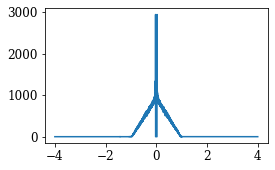

In [23]:
# Load the data:
# (see help(loadtxt) or scipy.org )
data = loadtxt('datag2.csv', delimiter=',')

#The first column of the file is the time in seconds
#The second column of the file is the autocorrelation function
datax = data[:,0]*1e6    
datay = data[:,1]

############## PLOT ###############
plt.plot(datax,datay)
#plt.savefig('images/simplefig.png',dpi=600) #in case you want to save this plot, uncomment this line
plt.show()

The plot above represents the autocorrelation function of the detected counts produced by a 1us long square pulse measured by a single-photon avalanche photodiode (SPAD).

It is a bad plot because:
* it is incomplete
* full of unnecessary information
* does not show clearly important information

By those alegations, I meant: to simplify, the graph does not have a title, legend on its axes, scale information and is not even presented in an interesting range for your analysis. 

Note that just by changing some of these properties mentioned above we can already observe notable differences:

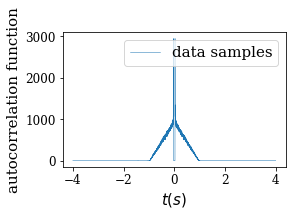

In [24]:
# Load the data:
# (see help(loadtxt) or scipy.org )
data = loadtxt('datag2.csv', delimiter=',')

#define axes
datax = data[:,0]*1e6    
datay = data[:,1]

############## PLOT ###############

plt.plot(datax,datay,label = 'data samples', linewidth=0.5)
plt.ylabel('autocorrelation function')
plt.xlabel('$t(s)$') 
plt.legend()
plt.show()

Now, for the next section we are going to dive further in the details of that plot.

## Identify things to change
In the following picture, the graph on the left shows the simplest graph. On the right hand side, a better graph (*alla Jean-Luc Doumont*). 

![](posts_images/comparison1.png)


In the figure on the right we have removed the data outside the region of interest. We have also shown an inset that clearly depicts the central feature of the data (the dead-time of the detector). Finally, we have added labels and changed the size/style of the font to be more "publication like"

To obtain the figure of the right, first we need to think/know what we want to change, and then change it.

Some of the differences are:
- Axes: limits, ticks, format
- Labels
- Colour
- Inset

A plot, in python, is an object. The axes are objects. The lines are objects. Understanding which member functions alter which characteristics of each of the objects is the key to being able to use python for publication-quality plotting. You don't need to learn these by heart: all the information can be found at [matplotlib documentation](https://matplotlib.org/)

![](posts_images/comparison2.png)


##  Constructing the figure

To construct the figure, firstly we will need to:

- Define style constants, so that the labels and ticks are plotted with the right fonts
- Create a figure object
- Create axis in the figure (add_subplot)
- Plot the data in the figure object
- Format the spines of the figure

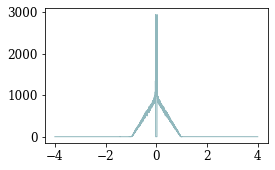

In [30]:
## - Change figure size and alter the fonts

# Graph 
golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 4                           # width in inches
fig_height = fig_width*golden_mean      # height in inches (4.5 for two vertical figures?)
fig_size = [fig_width,fig_height]

# Define format parameters
paramsscreen = {'backend': 'ps',
          'font.family':'serif',
          'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 12,
           'ytick.labelsize': 12,
           'figure.figsize': array(fig_size)}

paramsprint = {'backend': 'ps',
          'font.family':'serif',
          'axes.labelsize': 10,
           'legend.fontsize': 10,
           'xtick.labelsize': 8,
           'ytick.labelsize': 8,
           'figure.figsize': fig_size}


plt.rcParams.update(paramsscreen)

lightblue='#91B8BD'     # The colour used in the plot


## - Create figure object
fig=plt.figure() 

## - Create axis
bx=fig.add_subplot(111)

## - Plot in axis
bx.plot(datax,datay,'-',color =lightblue,lw=1)

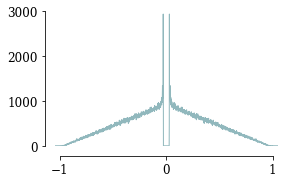

In [31]:
## Format the spines:
## - Remove upper and right spines
## - Remove unused ticks
## - Change limits of the plot and of the spines

# Spine formatting
labely=-0.2
bx.spines['left'].set_position(('outward',10))
bx.spines['bottom'].set_position(('outward',10))
bx.spines['top'].set_color('none')
bx.spines['right'].set_color('none')

# Even if the spines are removed from the top and right, the "ticks" are still present.
# To remove them:
bx.xaxis.set_ticks_position('bottom')
bx.yaxis.set_ticks_position('left')

# Change Y-Axis limits and format
bx.set_ylim([0,3000])
bx.set_yticks((0,1000,2000,3000))
bx.spines['left'].set_bounds(0,3000)   # Take the spine out, "alla Jean-Luc"

# Change X-Axis limits and format
bx.set_xlim(-1.05,1.05)                # The limit is set slightly over 1 for "artistic" purposes
bx.spines['bottom'].set_bounds(-1,1)
bx.set_xticks((-1,0,1))                # ... but we limit the spine to 1
display.display(fig)

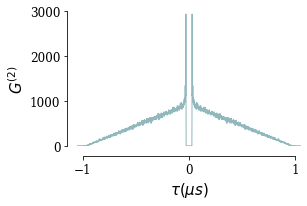

In [32]:
# - Add Labels (note that it supports Latex formatting).
# If we require escape characters, we use "r" before the string
yLab = '$G^{(2)}$'             
xLab = r'$\tau ( \mu s) $'   

bx.set_xlabel(xLab)
bx.set_ylabel(yLab)

display.display(fig)

## Adding an inset

After we have created the main plot by removing the least important information and formatting a little to make it the most aesthetics as possible, we are now able to create an inset for the figure, as shown in the inline example. 

* Create the axis that contain the inset.
* Plot the data of interest
* Format the spines (in the same way that we did before)

To format the axis in the inset we use an analogous procedure, but this time we refer to the inset axis instead of the figure one.

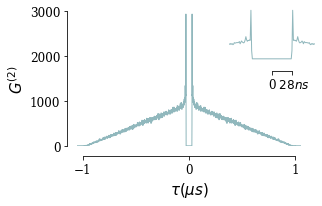

In [33]:
## - Plot inset:
## Requires location of the axis (as a percentage of the window)

######### INSET
inset = fig.add_axes((0.65, 0.6, 0.3, 0.3))     # (left, bottom, width, height)

inset.plot(datax,datay,'-',color =lightblue,lw=1)

## AXIS FORMATTING for the inset (analogous to the one before)
inset.spines['left'].set_color('none')
inset.spines['bottom'].set_position(('outward',10))
inset.spines['top'].set_color('none')
inset.spines['right'].set_color('none')
inset.xaxis.set_ticks_position('bottom')
inset.yaxis.set_ticks_position('left')

inset.set_yticks([])     #To avoid showing the vertical ticks.
inset.set_xlim(-0.06,0.06)
inset.set_xticks((0,28e-3))
inset.set_xticklabels(["0",r" $ 28 ns $"])
inset.spines['bottom'].set_bounds(0,0.028)


#plt.savefig('fancyfig.png',)  # Changed puke '-' to '-.'
display.display(fig)

## And that's all, folks!

I hope you like this tutorial! We now have created our first non-trivial plot using matplotlib, and (I hope) we are now able to produce several others in the context of our own research.

If you want, you can try changing the parameters, adding different lines to each of the plots, changing the position and size of the inset... 


For more details and information, as well as sugestions, feel free to contact me in one of my emails available in my github or personal website! 